# Project 2: Analysis of Video Game Sale 
The dataset comes from kaggle : https://www.kaggle.com/datasets/rishidamarla/video-game-sales

References: https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization

https://www.statology.org/rmse-python/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Video_Games.csv")
df = df.drop(["Critic_Count", "User_Count", "Developer","Rating"], axis=1)  #drop columns that won't be used
df = df.dropna(subset=["Year_of_Release", "Name", "Publisher"])             #drop rows with NaN value
df = df[(df["Year_of_Release"] < 2017)]                                     #only 4 data in 2017-2020, drop them
df["User_Score"] = df["User_Score"].replace('tbd', np.NaN)                  #replace tbd Score with NaN
df["User_Score"] = pd.to_numeric(df["User_Score"])                          #convert string to float in User_Score
#df.info()
df.iloc[31:40]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,6.3
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,5.3
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,4.8
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47,94.0,6.3
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,3.2
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,8.5
39,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.62,2.55,2.66,1.01,12.84,93.0,8.9


# Goals

1. Top best-selling game overall
2. Top best-selling game every year
3. Top best-selling game of each genre
4. Top best-selling game of each area
5. Predict User_Score using Global_Sales and Critic_Score  

### Part 1

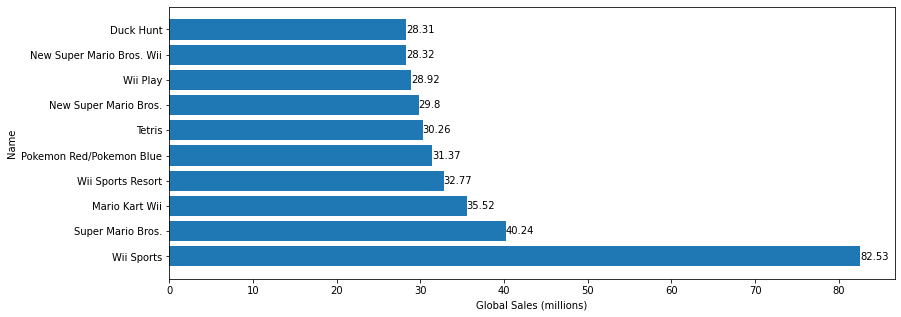

In [2]:
#Find top best-selling game overall

max_10 = df.nlargest(10, "Global_Sales")
#print(max_10[["Name", "Global_Sales"]])

fig, ax = plt.subplots()
ax.barh(y=max_10["Name"], width=max_10["Global_Sales"],color='b')
bars = ax.barh(max_10["Name"], max_10["Global_Sales"])
ax.bar_label(bars)
plt.ylabel("Name")
plt.xlabel("Global Sales (millions)")
fig.set_size_inches(13, 5)


### Part 2

In [3]:
#Find top best-selling game every year

max_idx = df.groupby("Year_of_Release")["Global_Sales"].idxmax()
Top_by_year = df.loc[max_idx]

Top_by_year = Top_by_year[["Year_of_Release", "Name", "Global_Sales"]]
Top_by_year


,Year_of_Release,Name,Global_Sales
262,1980.0,Asteroids,4.31
240,1981.0,Pitfall!,4.50
89,1982.0,Pac-Man,7.81
426,1983.0,Baseball,3.20
9,1984.0,Duck Hunt,28.31
1,1985.0,Super Mario Bros.,40.24
124,1986.0,The Legend of Zelda,6.51
252,1987.0,Zelda II: The Adventure of Link,4.38
22,1988.0,Super Mario Bros. 3,17.28
5,1989.0,Tetris,30.26


### Part 3

In [4]:
#Find top best-selling game of each genre

max_genre = df.groupby("Genre")["Global_Sales"].idxmax()
Top_by_genre = df.loc[max_genre]
Top_by_genre = Top_by_genre[["Genre", "Name", "Global_Sales"]]
Top_by_genre

,Genre,Name,Global_Sales
16,Action,Grand Theft Auto V,21.04
50,Adventure,Super Mario Land 2: 6 Golden Coins,11.18
39,Fighting,Super Smash Bros. Brawl,12.84
7,Misc,Wii Play,28.92
1,Platform,Super Mario Bros.,40.24
5,Puzzle,Tetris,30.26
2,Racing,Mario Kart Wii,35.52
4,Role-Playing,Pokemon Red/Pokemon Blue,31.37
9,Shooter,Duck Hunt,28.31
10,Simulation,Nintendogs,24.67


### Part 4

In [5]:
#Find top-selling game of each area

max_NA = df.nlargest(5, "NA_Sales")
print(max_NA[["Name", "NA_Sales"]])

max_EU = df.nlargest(5, "EU_Sales")
max_EU.iat[4, 0] = "Brain Age"
print(max_EU[["Name", "EU_Sales"]])

max_JP = df.nlargest(5, "JP_Sales")
print(max_JP[["Name", "JP_Sales"]])

                Name  NA_Sales
0         Wii Sports     41.36
1  Super Mario Bros.     29.08
9          Duck Hunt     26.93
5             Tetris     23.20
2     Mario Kart Wii     15.68
                 Name  EU_Sales
0          Wii Sports     28.96
2      Mario Kart Wii     12.76
10         Nintendogs     10.95
3   Wii Sports Resort     10.93
19          Brain Age      9.20
                             Name  JP_Sales
4        Pokemon Red/Pokemon Blue     10.22
12    Pokemon Gold/Pokemon Silver      7.20
1               Super Mario Bros.      6.81
6           New Super Mario Bros.      6.50
20  Pokemon Diamond/Pokemon Pearl      6.04


### Part 5

The RMSE is 1.1820921266276674


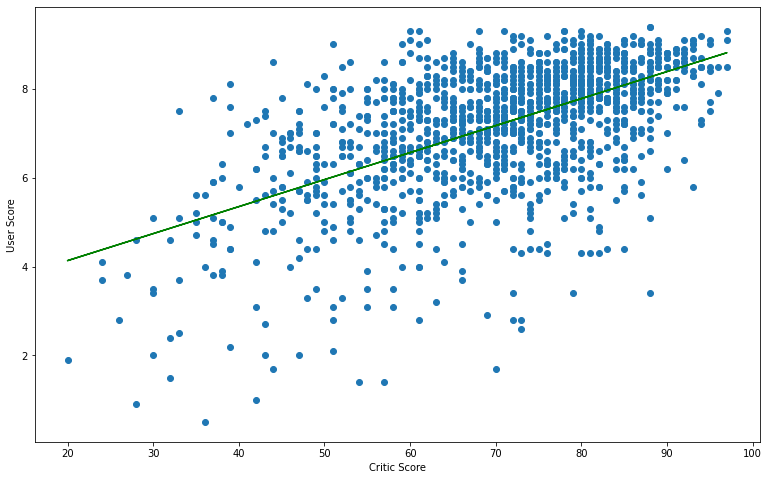

In [6]:
#Predict User_Score using Global_Sales and Critic_Score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_predict = df.dropna(subset=["Critic_Score", "User_Score"])
df_train = df_predict.sample(frac=0.8, random_state=107)
df_test = df_predict.drop(df_train.index)

model = LinearRegression().fit(df_train[["Critic_Score"]], df_train["User_Score"])
df_test["Predict_User_Score"] = model.predict(df_test[["Critic_Score"]])

RMSE = mean_squared_error(df_test["User_Score"], df_test["Predict_User_Score"])**0.5
print("The RMSE is", RMSE)

plt.scatter(df_test["Critic_Score"], df_test["User_Score"])
plt.plot(df_test["Critic_Score"], df_test["Predict_User_Score"], color='g')
plt.xlabel("Critic Score")
plt.ylabel("User Score")
fig = plt.gcf()
fig.set_size_inches(13, 8)
